In [4]:
import numpy as np
from scipy.special import expit
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

%matplotlib inline

In [5]:
def f(x):
    return x[0]**2 - x[0] * x[1] + x[1]**2 + np.sin(x[0])

In [6]:
x_cur = np.array([1156151, -10000])
x_last = np.array([0, 0])

In [7]:
while np.linalg.norm(x_last - x_cur) > 1e-10:
    x_last = x_cur.copy()
    print(f(x_cur))
    df = np.matrix([[2 * x_cur[0] - x_cur[1] + np.cos(x_cur[0])], [-x_cur[0] + 2 * x_cur[1]]])
    H = np.matrix([[2 - np.sin(x_cur[0]), -1], [-1, 2]])
    x_cur = x_last - (np.linalg.inv(H) * df).T.A[0, :]

1.3483466448e+12
1.2838339885e+12
190947388665.0
560809340568.0
25958831011.9
1206308750.02
83232601.8384
8628838.17889
1114419.77157
634.774112811
572.667154156
245.297448853
177.760474155
8.8149652126
2.47095732058
6.72638312488
0.492891959824
-0.130280516991
-0.295479271728
-0.295999137637
-0.295999148614
-0.295999148614


In [8]:
print(f(x_cur))

-0.295999148614


In [10]:
print(x_cur)

[-0.5635692 -0.2817846]


In [11]:
a = np.array([1, 2])
b = np.array([1, 2])
np.dot(a, b)

5

In [73]:
    def w_mp_evaluating(t_matrix, w_mp_c):
        print('\nW_mp Evaluating')
#         a = np.matrix(np.diag(self.alpha))
        w_mp_old = np.matrix(np.zeros(w_mp_c.shape))
        bound = 1e-6

        sigma = np.matrix(np.zeros(a.shape))
        cur = calc_logproba(w_mp_c)
        last = 0
        print('LIKELIHOOD', cur)
        
        n_iteratoin = 0

        while np.abs(cur - last) > bound and n_iteratoin < 99: # np.abs(cur - last) > bound: # np.linalg.norm(w_mp_c - w_mp_old) > bound:
            n_iteratoin += 1
            last = cur
            s = []
            for i in range(N):
                s.append(1 / (1 + np.exp(-(F[i, :] * w_mp_c).A[0][0])))

            s = np.array(s)
            r = np.matrix(np.diag(s * (1 - s)))
            sigma = np.linalg.inv(F.T * r * F + a)
            w_mp_old = w_mp_c
            
            w_mp_c = w_mp_c - 0.5 * sigma * (F.T * (np.matrix(s) - t_matrix).T + a * w_mp_c)
#             w_mp_c = sigma * F.T * r * t_matrix.T

            cur = calc_logproba(w_mp_c)
    
            s = []
            for i in range(N):
                s.append(1 / (1 + np.exp(-(F[i, :] * w_mp_c).A[0][0])))

            s = np.array(s)
            
            print(cur - last, np.linalg.norm((F.T * (np.matrix(s) - t_matrix).T + a * w_mp_c)), cur)

        print('LIKELIHOOD', cur)
        return w_mp_c


In [13]:
    def calc_logproba(_w):
        ans = []
        if _w.shape == (2, 1):
            _w = [_w]
        for w in _w:
            t = data_t
            logprob = 0
            for i in range(len(t)):
                a_exp = -(F[i, :] * w).A[0][0]
                if t[i] == 1:
                    logprob += -np.log(1 + np.exp(a_exp))
                else:
                    logprob += a_exp - np.log(1 + np.exp(a_exp))
            logprob -= 0.5 * (w.T * a * w).A[0][0]
            ans.append(-logprob)
        return ans[0] if len(ans) == 1 else np.array(ans)


In [69]:
N = 2
data_t = np.array([1, 0])
t_matrix = np.matrix([[1, 0]])
a = np.matrix(np.diag([1, 2]))
F = np.matrix([[4, 5], [8, 1]])

In [15]:
F

matrix([[4, 5],
        [8, 1]])

In [16]:
calc_logproba(np.array([np.matrix([[-5], [-5]]), t_matrix.T]))

array([ 82.5       ,   8.51848533])

In [76]:
w_mp = w_mp_evaluating(t_matrix, np.matrix([[15], [0]]))


W_mp Evaluating
LIKELIHOOD 232.5
-198.562497098 11.5108522046 33.9375029023
-20.3933655948 8.49208068217 13.5441373075
-3.98452246265 9.40388526743 9.55961484485
8.86893346611 8.66507410293 18.428548311
-12.8517315655 8.88502563754 5.57681674544
-2.87561355268 5.19353147907 2.70120319276
-1.98214235348 1.0882692772 0.719060839284
-0.0357629666916 0.518639867754 0.683297872592
-0.00730054573263 0.257028155884 0.675997326859
-0.00176966279376 0.12824205653 0.674227664066
-0.000440524151426 0.0640859630216 0.673787139914
-0.000110167122012 0.0320381562416 0.673676972792
-2.75626041266e-05 0.0160183562211 0.673649410188
-6.89425853673e-06 0.00800905775454 0.67364251593
-1.72407799437e-06 0.00400450627844 0.673640791852
-4.31087560315e-07 0.00200224842432 0.673640360764
LIKELIHOOD 0.673640360764


In [50]:
def f(x, y):
    return np.log(1 + np.exp(- x * 4 - y * 45 )) + 8*x + y + np.log(1 + np.exp(-8 * x - y)) + 0.5 * x**2 + y**2

In [51]:
x = np.linspace(-5, 5, 100)              # points in the x axis
y = np.linspace(-5, 5, 100)              # points in the y axis
X, Y = np.meshgrid(x, y)                # create the "base grid"
Z = f(X, Y)

#calc_logproba(np.array([np.matrix([[x[i]], [y[i]]]) for i in range(len(x))]))

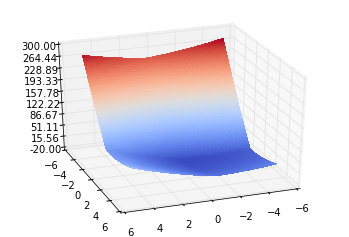

In [59]:
fig = plt.figure()
ax = fig.gca(projection='3d')
# ax.plot_wireframe(X, Y, Z, rstride=5, cstride=5)


surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
# ax.set_zlim(-1.01, 1.01)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# fig.colorbar(surf, shrink=0.5, aspect=5)
ax.view_init(30, 70)

ax.scatter3D([-0.2525252525252526], [0.45454545454545414], -1+calc_logproba(np.matrix([[-0.2525252525252526], [0.45454545454545414]])), c='r')


In [21]:
w = np.matrix([[-6.0060060060060056], [1.2612612612612608]]

SyntaxError: unexpected EOF while parsing (<ipython-input-21-7695e199b683>, line 1)

In [22]:
x, y = -0.2525252525252526, 0.45454545454545414

In [23]:
f(x, y)

0.67737990692112071

In [24]:
calc_logproba(w_mp)

0.67364021705484589

In [25]:
X.reshape((100**2, ))[Z.argmin()], Y.reshape((100**2, ))[Z.argmin()]

(-0.2525252525252526, 0.45454545454545414)

In [60]:
Z.argmin()

5146

In [61]:
tmp = Z.reshape((100**2, ))
tmp[Z.argmin()]

0.15646135759214938

In [28]:
Z.min()

0.67737990692112071

In [29]:
w_mp_c = np.matrix([[-0.], [0]])

In [38]:
            s = []
            for i in range(N):
                s.append(1 / (1 + np.exp(-(F[i, :] * w_mp_c).A[0][0])))

            s = np.array(s)
            r = np.matrix(np.diag(s * (1 - s)))
            sigma = np.linalg.inv(F.T * r * F + a)


In [39]:
(F.T * (np.matrix(s) - t_matrix).T + a * w_mp_c)

matrix([[  5.10638609e-09],
        [  5.35560707e-10]])

In [62]:
w_mp_c = w_mp
w_mp_c

matrix([[-0.3820067 ],
        [ 0.14257583]])

In [40]:
-4 / (1 + np.exp(4*x + 5*y)) + 8 - 8 / (1 + np.exp(8*x + y)) +  x

0.24807795502198005

In [41]:
w = np.linalg.inv(a) * F.T * (-np.matrix(s) + t_matrix).T

In [42]:
calc_logproba(w_mp_c)

0.67364021705484589

In [43]:
w

matrix([[-0.28126675],
        [ 0.47789904]])